In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [69]:
#!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [70]:
births = pd.read_csv('data/births.csv')

In [71]:
display(births.head(), births.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


None

In [72]:
births.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [73]:
births.births.describe()

count     15547.000000
mean       9762.293561
std       28552.465810
min           1.000000
25%        4358.000000
50%        4814.000000
75%        5289.500000
max      199622.000000
Name: births, dtype: float64

In [74]:
#so how do we define what an outlier is?
len(births[births['births'] > 20000]), len(births[births['births'] < 500])

(480, 457)

<Axes: >

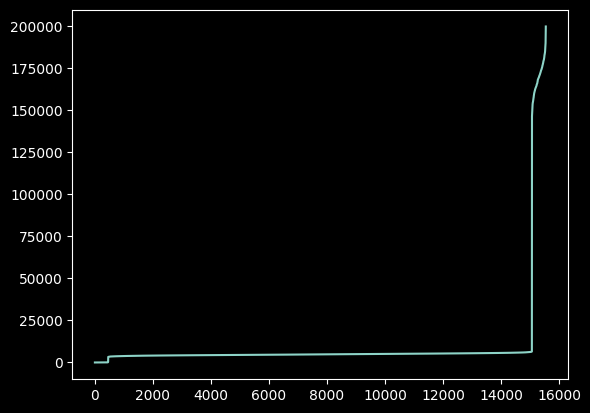

In [75]:
#don't forget to use .copy() 
array = births['births'].values.copy()
array.sort()
series = pd.Series(array)
series.plot()

In [76]:
births['decade'] = 10 * (births['year'] // 10) 
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


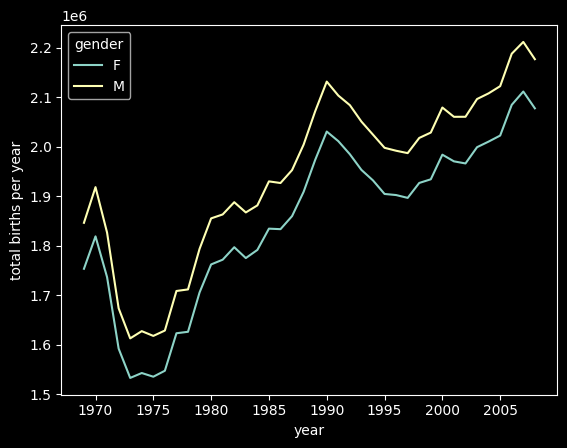

In [77]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')
plt.show()

In [78]:
#outlier removal
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [79]:
births.births.describe()

count    14610.000000
mean      4824.470089
std        579.996983
min       3249.000000
25%       4383.000000
50%       4812.000000
75%       5259.000000
max       6527.000000
Name: births, dtype: float64

In [80]:
births.isna().sum()

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

In [81]:
#now since there are no more NaN values convert day column to int
births['day'] = births['day'].astype(int)

In [86]:
#put the dates in the right format to create datetime index
dates = 10000 * births.year + 100 * births.month + births.day
dates

1969-01-01    19690101
1969-01-01    19690101
1969-01-02    19690102
1969-01-02    19690102
1969-01-03    19690103
                ...   
1988-12-29    19881229
1988-12-30    19881230
1988-12-30    19881230
1988-12-31    19881231
1988-12-31    19881231
Length: 14610, dtype: int64

In [83]:
births.index = pd.to_datetime(dates, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

In [84]:
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

births['weekdays'] = births['dayofweek'].map(weekday_mapping)

In [85]:
births

,year,month,day,gender,births,decade,dayofweek,weekdays
1969-01-01,1969,1,1,F,4046,1960,2,Wednesday
1969-01-01,1969,1,1,M,4440,1960,2,Wednesday
1969-01-02,1969,1,2,F,4454,1960,3,Thursday
1969-01-02,1969,1,2,M,4548,1960,3,Thursday
1969-01-03,1969,1,3,F,4548,1960,4,Friday
...,...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3,Thursday
1988-12-30,1988,12,30,F,5742,1980,4,Friday
1988-12-30,1988,12,30,M,6095,1980,4,Friday
1988-12-31,1988,12,31,F,4435,1980,5,Saturday


In [50]:
births.drop(['year', 'day', 'month'], axis=1, inplace=True)
births

,gender,births,decade,dayofweek,weekdays
1969-01-01,F,4046,1960,2,Wednesday
1969-01-01,M,4440,1960,2,Wednesday
1969-01-02,F,4454,1960,3,Thursday
1969-01-02,M,4548,1960,3,Thursday
1969-01-03,F,4548,1960,4,Friday
...,...,...,...,...,...
1988-12-29,M,5944,1980,3,Thursday
1988-12-30,F,5742,1980,4,Friday
1988-12-30,M,6095,1980,4,Friday
1988-12-31,F,4435,1980,5,Saturday


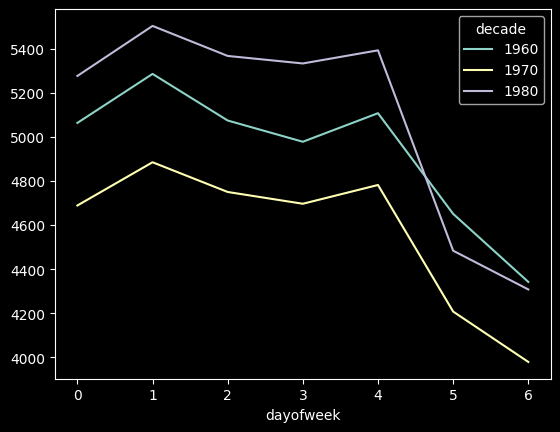

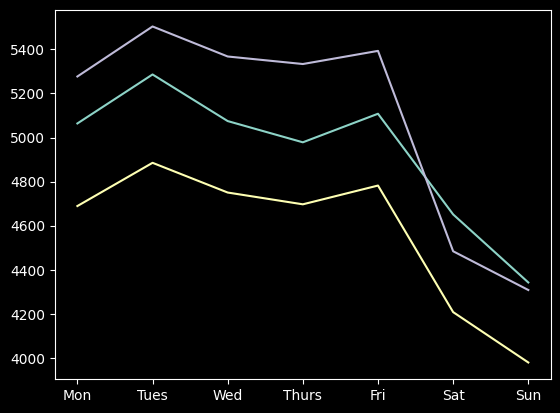

In [66]:
table = births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean')
table.plot()
plt.show()
plt.plot(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], table.values)
plt.show()

In [52]:
from math import *

In [53]:
tan(radians(45)), degrees(atan(.9))

(0.9999999999999999, 41.98721249581666)

In [54]:
t = tan
r = radians

In [55]:
t(r(45))

0.9999999999999999

In [56]:
rad_tan = lambda x: t(r(x))
atan_rad = lambda x: degrees(atan(x))

In [57]:
atan_rad(1), rad_tan(45)

(45.0, 0.9999999999999999)